<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# TASK 1: Become familiar with the dataset

In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations

### 2.1: For the "Median value of owner occupied homes" provide a boxplot

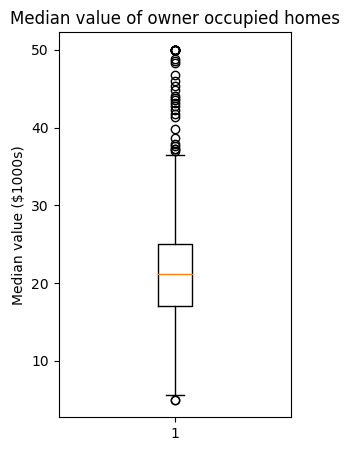

In [17]:
plt.figure(figsize=(3,5))
plt.boxplot(boston_df['MEDV'])
plt.title('Median value of owner occupied homes')
plt.ylabel('Median value ($1000s)')
plt.show()

### 2.2: Provide a bar plot for the Charles river variable

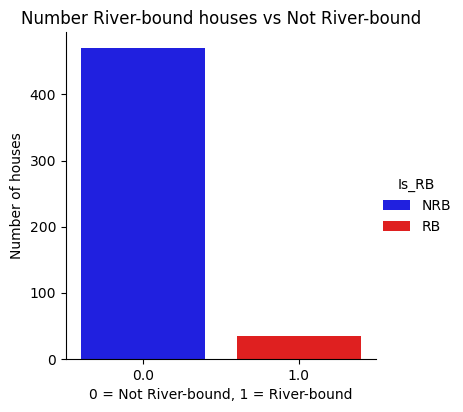

In [43]:
# assign labels to CHAS values
boston_df.loc[boston_df['CHAS']==1,'Is_RB']='RB'
boston_df.loc[boston_df['CHAS']==0,'Is_RB']='NRB'
# plot
sns.catplot(
    x='CHAS',kind='count',data=boston_df,hue='Is_RB',height=4,aspect=1,
    palette={'RB':'red','NRB':'blue'})
plt.title('Number River-bound houses vs Not River-bound')
plt.xlabel('0 = Not River-bound, 1 = River-bound')
plt.ylabel('Number of houses')
plt.show()

### 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. 

Discretize the age variable into three groups of of 35 years and younger, between 35 and 70 years, and 70 years and older 

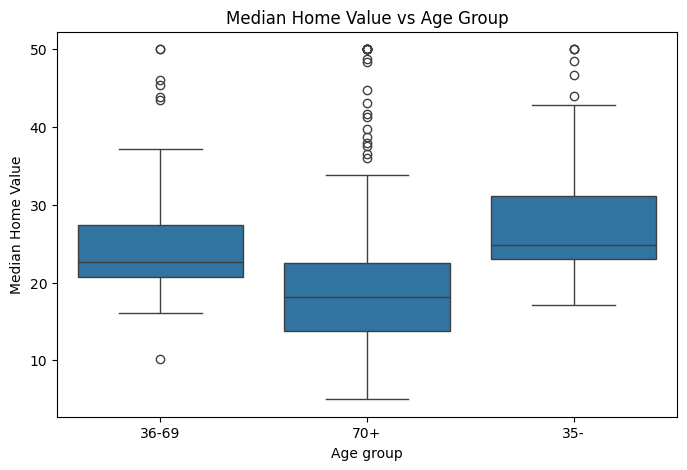

In [48]:
# assign labels to age groups
boston_df.loc[boston_df['AGE']<=35,'age_group']='35-'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='36-69'
boston_df.loc[boston_df['AGE']>=70,'age_group']='70+'
# plot
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group',y='MEDV',data=boston_df)
plt.title('Median Home Value vs Age Group')
plt.xlabel('Age group')
plt.ylabel('Median Home Value')
plt.show()

### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

What can you say about the relationship?

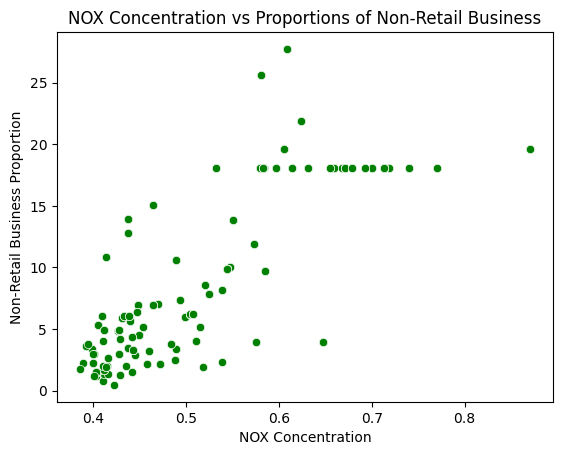

In [49]:
# plot
sns.scatterplot(x='NOX',y='INDUS',data=boston_df,color='green')
plt.title('NOX Concentration vs Proportions of Non-Retail Business')
plt.xlabel('NOX Concentration')
plt.ylabel('Non-Retail Business Proportion')
plt.show()

There seems to be a positive correlation between Non-Retail Business Proportions and Nitric Oxide concentrations

### 2.5: Create a histogram for the pupil to teacher ratio

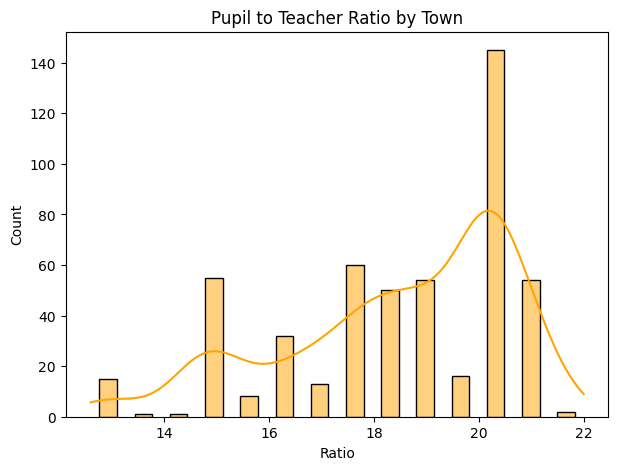

In [54]:
# plot
plt.figure(figsize=(7,5))
sns.histplot(x='PTRATIO',data=boston_df,shrink=0.5,color='orange',kde=True)
plt.title('Pupil to Teacher Ratio by Town')
plt.xlabel('Ratio')
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided

### Q1:

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

***H0***: There is no significant difference in MDEV between houses bound by the Charles River and houses not bound

***Ha***: There is a signiciant difference in MDEV between houses bound by the Charles river and houses not bound

In [59]:
# use Levene's test to confirm equality of variances
scipy.stats.levene(
    boston_df[boston_df['Is_RB']=='RB']['MEDV'],
    boston_df[boston_df['Is_RB']=='NRB']['MEDV'],
    center='median'
)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

The p-value is 0.0326 which is < 0.05
Therefore, we can reject the null hypothesis and assume that there is a significant difference in MEDV between houses bound by the Charles and houses not bound

In [70]:
# execute t-test
scipy.stats.ttest_ind(
    boston_df[boston_df['Is_RB']=='RB']['MEDV'],
    boston_df[boston_df['Is_RB']=='NRB']['MEDV'],
    equal_var=False
)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

The p-value is 0.00356 which is < 0.05. We can reject the null hypothesis, and conclude that statistically there is a significant difference in MDEV between houses bound by the Charles and houses not bound

### Q2:

Is there a difference in Median values of houses (MDEV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

***H0***: There is no difference in MDEV for each proportion of owner occupied units built prior to 1940

***Ha***: There is a difference in MDEV for at least 1 proportion of owner occupied units built prior to 1940

In [71]:
# run ANOVA test
f_stats,p_val=scipy.stats.f_oneway(
    boston_df[boston_df['age_group']=='35-']['MEDV'],
    boston_df[boston_df['age_group']=='36-69']['MEDV'],
    boston_df[boston_df['age_group']=='70+']['MEDV']
)
print(f'f_stats: {f_stats}')
print(f'p_value: {p_val}')

f_stats: 36.40764999196599
p_value: 1.7105011022702984e-15


The p-value is <0.05, therefore we can reject the null hypothesis and conclude that statistically, at least 1 age group has a significant difference in MEDV from the other age groups

### Q3:

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

***H0***: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

***Ha***: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [72]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The p-value is <0.05, therefore we can reject the null hypothesis and conclude that there is a statistical relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### Q4:

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

***H0***: Additional weighted distance to the five Boston employment centers will have no impact on the MDEV of owner occupied homes

***Ha:*** Additional weighted distance to the five Boston employment centers will have a significant impact on the MDEV of owner occupied homes

In [77]:
model=ols('MEDV ~ DIS',data=boston_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        11:07:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is <0.05, therefore we can reject the null hypothesis and conclude that additional weighted distance to the five boston employment centers does statistically have a significant impact on MEDV of owner occupied homes

# END OF ASSIGNMENT

Author: Aaron Hamilton